In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class Estacion:
    #Nombre de estacion y conjunto de clases "fonos" dentro de la estacion
    def __init__(self, Nombre):
        self.Nombre = Nombre
        self.Clases = []
        self.Tiempo = 0
        print("Estacion", self.Nombre, "añadida")
        
    def to_dict(self):
        return {
            "Nombre": self.Nombre,
            "Clases": self.Clases
        }

class Clase:
    #los tipos de fonos
    def __init__(self, Nombre, Estacion):
        self.Nombre = Nombre
        self.Tiempo = 0
        self.Estacion = Estacion
        self.Contador = 0
        self.Tiempo_est = 0
        
    def to_dict(self):
        return {
            "Estacion": self.Estacion,
            "Clase": self.Nombre,
            "Tiempo": self.Tiempo,
            "Contador": self.Contador,
            "Tiempo_est": self.Tiempo_est
        }
    
    
clases = []
estaciones = []

In [3]:
#Lectura de datos
df = pd.read_csv("metadata1_4.txt", sep="\t", engine = "python")

est = df.station.unique()
cl = df.kind.unique()

In [4]:
#Asignacion y creacion de objetos
estaciones.clear()
clases.clear()

for e in range(len(est)):
    
    estaciones.append(Estacion(est[e])) 

Estacion capta_002 añadida
Estacion capta_004 añadida
Estacion capta_003 añadida
Estacion campus_miraflores añadida
Estacion control_acustico añadida


In [5]:
#Creacion de instancias de clases asignandolas al slice de su estacion
for e in estaciones:
    
    for c in cl:
        
        e.Clases.append(Clase(c, e.Nombre))

In [6]:
#Correr esta celda SOLO 1 vez o usar %reset antes, duplicacion de datos en cada ejecucion
#Asignacion de valores al as clases desde df
for i in range(df.shape[0]):
    
    for e in estaciones:
        if(e.Nombre == df.loc[i][4]):
            for c in e.Clases:
                dif = 0
                if(c.Nombre == df.loc[i][3]):
                    dif = df.loc[i][2]-df.loc[i][1]
                    setattr(c, "Tiempo", getattr(c, "Tiempo") + dif)
                    setattr(e, "Tiempo", getattr(e, "Tiempo") + dif)
                    setattr(c, "Contador", getattr(c, "Contador") + 1)
                    break
            break
 

In [7]:
#Preparacion para crear un dataframe
data_e = []

for e in estaciones:
    for c in e.Clases:
#         if(c.Estacion != "capta_002"):
        setattr(c, "Tiempo_est", getattr(e, "Tiempo"))
        data_e.append(c)


In [8]:
vars(data_e[1])

{'Nombre': 'car_moving',
 'Tiempo': 8827.200524956002,
 'Estacion': 'capta_002',
 'Contador': 798,
 'Tiempo_est': 53014.95197801204}

In [9]:
#Creacion de data frame y nuevas columnas
#Tiempo = tiempo en segundos de cada clase x estacion
#Contador = cantidad de eventos de cada clase x estacion
#Tiempo_est = tiempo total en segundos de la estacion sumando cada tiempo de clase
#Tiempo_promedio = el tiempo promedio de cada evento por estacion
#Tiempo_n = tiempo en % del evento por estacion

df_n = pd.DataFrame([d.to_dict() for d in data_e])
df_n = df_n.assign(Tiempo_promedio=lambda x: x.Tiempo / x.Contador)
df_n = df_n.assign(Tiempo_n=lambda x: 100 * x.Tiempo / x.Tiempo_est)


df_n

,Estacion,Clase,Tiempo,Contador,Tiempo_est,Tiempo_promedio,Tiempo_n
0,capta_002,dog,4064.827370,1940,53014.951978,2.095272,7.667323
1,capta_002,car_moving,8827.200525,798,53014.951978,11.061655,16.650398
2,capta_002,wind,6217.247306,577,53014.951978,10.775125,11.727347
3,capta_002,impact,710.747444,359,53014.951978,1.979798,1.340655
4,capta_002,crowd,52.300527,14,53014.951978,3.735752,0.098652
...,...,...,...,...,...,...,...
135,control_acustico,drilling,99.734242,23,4738.531009,4.336271,2.104750
136,control_acustico,water,0.000000,0,4738.531009,NaN,0.000000
137,control_acustico,airborne,69.715678,8,4738.531009,8.714460,1.471251
138,control_acustico,bus_idling,50.168119,5,4738.531009,10.033624,1.058727


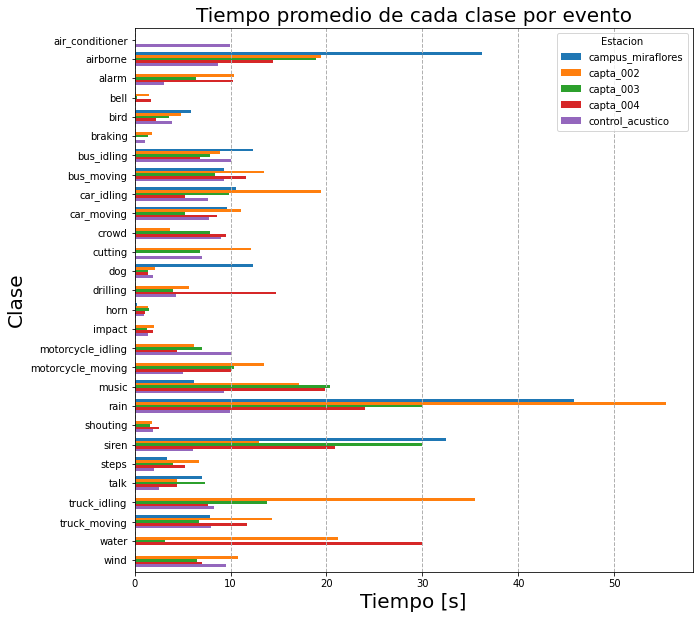

In [10]:
bx = df_n.pivot_table(index="Clase", columns="Estacion", values="Tiempo_promedio").plot.barh(figsize=(10,10), width=0.7, align ="center", subplots=False)
bx.set_title("Tiempo promedio de cada Evento por Estación", fontsize=20)
bx.set_ylabel("Clase", fontsize=20)
bx.set_xlabel("Tiempo [s]", fontsize=20)
bx.xaxis.grid(linestyle='--', linewidth=1)

bx.invert_yaxis()


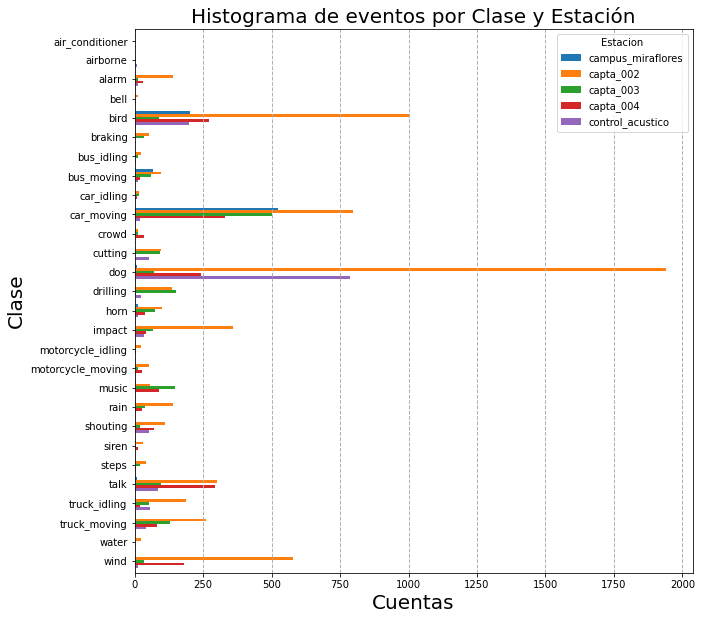

In [11]:
df_est = pd.DataFrame([d.to_dict() for d in data_e])

ax = df_est.pivot_table(index="Clase", columns="Estacion", values="Contador").plot.barh(figsize=(10,10), width=0.7, align ="center", subplots=False)

ax.set_title("Histograma de eventos por Clase y Estación", fontsize=20)
ax.set_ylabel("Clase", fontsize=20)
ax.set_xlabel("Cuentas", fontsize=20)
ax.xaxis.grid(linestyle='--', linewidth=1)

ax.invert_yaxis()

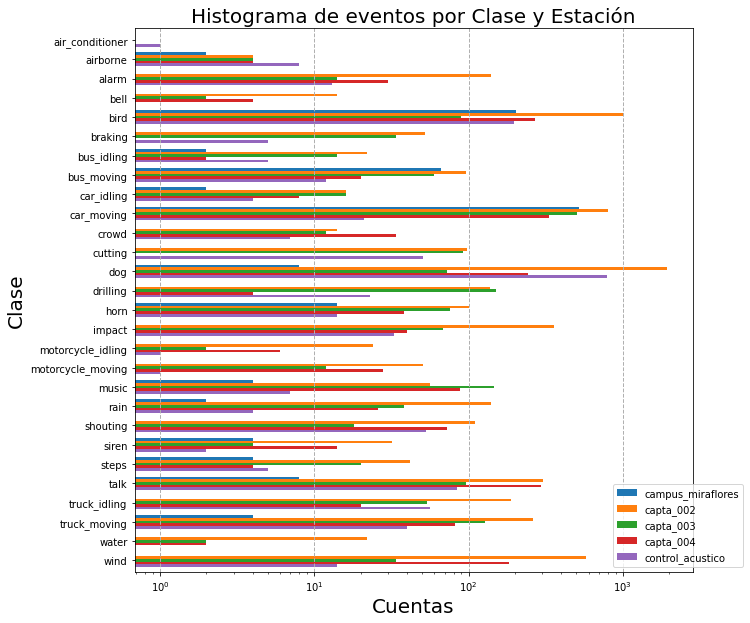

In [25]:
df_est = pd.DataFrame([d.to_dict() for d in data_e])

ax = df_est.pivot_table(index="Clase", columns="Estacion", values="Contador").plot.barh(figsize=(10,10), width=0.7, align ="center", subplots=False, logx=True)

ax.set_title("Histograma de eventos por Clase y Estación", fontsize=20)
ax.set_ylabel("Clase", fontsize=20)
ax.set_xlabel("Cuentas", fontsize=20)
ax.xaxis.grid(linestyle='--', linewidth=1)

plt.legend(bbox_to_anchor=(1.1, 0), ncol=1, loc="lower right", prop={"size": 10})


ax.invert_yaxis()